# ONLINE SHOPPER'S INTENTION

In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [275]:
df = pd.read_csv('online_shoppers_intention_given.csv')
pd.set_option('max_columns',100)

In [276]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [277]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [278]:
df_target = df.drop(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'],1)                 # copying the target column in a separate dataframe

In [279]:
df_target.head()

,Revenue
0,False
1,False
2,False
3,False
4,False


In [280]:
df_target['Revenue'] = df_target['Revenue'].map({True:1,False:0})   # mapping the target feature

In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [282]:
# There are no null values in the dataset.

In [283]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [284]:
dff = df.drop('Revenue',1)   # dropping the target column

In [285]:
dummy = pd.get_dummies(dff[['Month','VisitorType']])    # dummying the categorical features

In [319]:
dummy.head()

,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,0,0,1


In [320]:
dff_new = pd.concat([dff,dummy],1)           # concatenating the dummied dataframe and the original dataframe

In [321]:
dff_new.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,0,0,1,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,0,0,1,0,0,0,0,0,0,0,0,0,1


In [322]:
dff_new.drop(['Month','VisitorType'] ,1,inplace = True)   # dropping the original month and visitor type features.

In [323]:
dff_new['Weekend'] = dff_new['Weekend'].map({True:1,False:0})       # we are mapping the weekend values into 1s and 0s

In [324]:
# dff.drop('Weekend',1,inplace = True)

In [325]:
dff_new.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,1,0,0,1,0,0,0,0,0,0,0,0,0,1


In [327]:
dff_new.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [328]:
num = dff_new.drop(['Weekend',
       'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],1)       # creating a new numerical DF by dropping all the categorical features

In [329]:
cat = dff_new[['Weekend',
       'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor']].copy() # copying all the categorical features to a new DF

In [330]:
cat.head()   # categorical features

,Weekend,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,1,0,0,1,0,0,0,0,0,0,0,0,0,1


In [331]:
num.head()    #  numerical features

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4


In [332]:
# Inference: There are no null values in the dataset. The target feature has 2 classes.
# The classes have been mapped to 0s and 1s.
# Later the dataset has been divided into numerical and categorical datasets.
# The categorical data cannot be scaled. Therefore the categorical columns has been dummied.

In [333]:
from sklearn.preprocessing import StandardScaler

In [334]:
sc = StandardScaler()
dfsc = sc.fit_transform(num)  # scaling the numerical data

In [335]:
dfsc = pd.DataFrame(dfsc,columns = num.columns)

# KMEANS

In [336]:
dfsc.shape

(12330, 14)

In [337]:
dfs = pd.concat([dfsc,cat],1)    # concatenating the sacled numerical values and the dummied categorical values.

In [338]:
dfs.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.233426,-0.790293,-0.894178,-0.762629,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,-0.136078,-0.207952,-0.894178,-0.514182,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,2.058618,-0.790293,2.437081,-0.265735,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,0.961270,-0.207952,-0.477771,-0.017289,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,0.961270,0.374389,-0.894178,-0.017289,1,0,0,1,0,0,0,0,0,0,0,0,0,1


In [339]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 14)
km.fit(dfs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=14, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [340]:
print(km.cluster_centers_)   # centroids
print(km.labels_)       # predicted

[[-3.95467312e-01 -2.98116504e-01 -2.64599032e-01 -2.05096190e-01
  -2.22130563e-01 -2.09724473e-01 -2.72304672e-01 -1.69092065e-01
  -2.10258571e-01 -2.86512192e-01 -5.19807190e-01 -2.79288695e-01
  -4.96379224e-01 -3.78856305e-01  2.24062500e-01  3.87500000e-02
   1.52500000e-01  1.78125000e-02  3.87500000e-02  2.50000000e-02
   1.95000000e-01  2.14687500e-01  2.34062500e-01  4.43750000e-02
   3.90625000e-02  1.71250000e-01  3.43750000e-03  8.25312500e-01]
 [-3.12465830e-01 -2.25028118e-01 -2.47306007e-01 -1.85756035e-01
  -1.90863356e-01 -1.60847654e-01 -1.13932612e-01 -3.23740558e-02
  -2.09192741e-01 -1.97307442e-01  2.33085029e-01 -1.43366977e-01
  -8.29151239e-02  2.13354470e+00  2.31053604e-01  2.03327172e-02
   1.32162662e-01  2.77555756e-16  3.23475046e-02  2.86506470e-02
   1.37707948e-01  2.27356747e-01  3.53974122e-01  4.62107209e-02
   2.12569316e-02  7.39371534e-02  4.62107209e-03  9.21441774e-01]
 [-2.13765619e-01 -1.86164074e-01 -2.33979691e-01 -1.91666967e-01
  -2.026

In [349]:
km_pred = km.fit_predict(dfs)

In [350]:
km_error = []
for i in range(1,20):
    km = KMeans(n_clusters=i)
    km.fit(dfs)
    km_error.append(km.inertia_)
print(km_error)

[187954.76545012166, 164198.6973377804, 144541.33128343386, 134191.94933824512, 126712.12584641576, 119572.25791539413, 113123.48719327741, 107303.0853248214, 101844.14386669383, 98637.77409789198, 93171.3465285755, 89692.41952013366, 86620.58865576153, 83761.7526937118, 81180.23037820784, 78980.9912817535, 78112.18771149617, 76227.93069430934, 75251.20648086302]


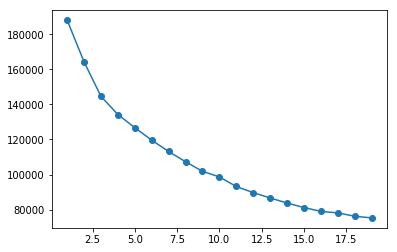

In [351]:
plt.plot(np.array(range(1,20)),np.array(km_error),'o-')

In [352]:
# From the graph we can infer that the optimum number of clusters is 2.

In [353]:
km = KMeans(n_clusters = 2)
km.fit(dfs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [354]:
print(km.cluster_centers_)   # centroids
print(km.labels_)       # predicted

[[-0.26242625 -0.21615886 -0.25315482 -0.19626743 -0.24203402 -0.22603442
   0.05903546  0.08768768 -0.03775502  0.0297668   0.00422289  0.0146342
   0.01224887  0.020483    0.22924032  0.0339226   0.14247492  0.01720019
   0.03564262  0.02341137  0.16426183  0.28600096  0.21958911  0.04214047
   0.03535595  0.15011945  0.00783564  0.84204491]
 [ 1.47254194  1.21292357  1.4205175   1.10130761  1.35811583  1.2683379
  -0.33126331 -0.4920384   0.21185323 -0.16702927 -0.02369572 -0.08211632
  -0.0687316  -0.11493545  0.25147453  0.04182306  0.12654155  0.00214477
   0.03163539  0.0230563   0.10080429  0.19892761  0.37533512  0.05790885
   0.04182306  0.06595174  0.00160858  0.93243968]]
[0 0 0 ... 0 0 0]


In [355]:
km_pred_1 = km.fit_predict(dfs)

In [356]:
num_clusters = range(1,20)
km_error = []
for num_clusters in range(1,20):
    km = KMeans(num_clusters)
    km.fit(dfs)
    km_error.append(km.inertia_)
print(km_error)

[187954.76545012166, 164198.63300588215, 144541.33128343386, 134190.612302429, 126445.305207105, 119515.7403028431, 113046.28616978443, 107416.75782351528, 101829.94202515722, 96577.44685376203, 93167.62480079698, 89733.6754382285, 86784.1124084178, 83581.33151609753, 81155.04971087519, 79846.51968826201, 77554.60814556976, 76707.16417904697, 74807.80370096143]


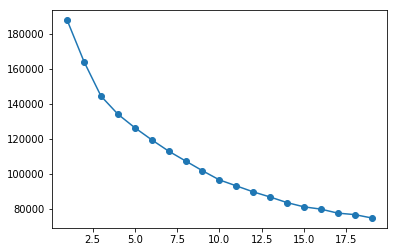

In [360]:
plt.plot(np.array(range(1,20)),np.array(km_error),'o-')

# HIERARCHIAL

In [361]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram     # importing the neccesary libraries.
from scipy.cluster.hierarchy import linkage

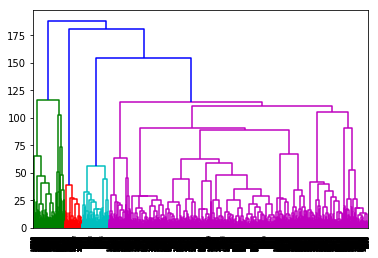

In [460]:
dendrogram(linkage(dfs,'ward'))
plt.show()

In [461]:
# The optimum value is 2.

In [363]:
ag = AgglomerativeClustering(n_clusters = 2)
ag.fit(dfs)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2,
                        pooling_func='deprecated')

In [364]:
ag_pred = ag.fit_predict(dfs)

In [365]:
ag_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [462]:
kmeans = KMeans(n_clusters=2,init = 'k-means++',max_iter = 300, random_state=0)
y_kmeans = kmeans.fit_predict(dfs)

In [376]:
# CONVERTING UNSUPERVISED DATA INTO SUPERVISED DATA

In [377]:
pred = pd.DataFrame({'kmean_pred':km_pred_1,'ag_pred':ag_pred})

In [378]:
final = pd.concat([df,pred],1)

In [379]:
final.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,kmean_pred,ag_pred
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,1,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,1,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,1,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,1,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,1,0


### CONFUSION MATRIX

In [380]:
final.kmean_pred.value_counts()

1    10458
0     1872
Name: kmean_pred, dtype: int64

In [381]:
df.Revenue.value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [382]:
# final['Revenue'] = final['Revenue'].map({False:0,True:1})

In [383]:
# final['Revenue'].value_counts()

In [468]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [469]:
print(confusion_matrix(final['Revenue'],final['kmean_pred']))

[[1349 9073]
 [ 523 1385]]


In [470]:
print('accuracy of kmean is: ', accuracy_score(final['Revenue'],final['kmean_pred']))

accuracy of kmean is:  0.22173560421735605


In [387]:
print(confusion_matrix(final['Revenue'],final['ag_pred']))

[[9551  871]
 [1609  299]]


In [388]:
print('accuracy of agglomerative clustering is :',accuracy_score(final['Revenue'],final['ag_pred']))

accuracy of agglomerative clustering is : 0.7988645579886455


In [389]:
# As we can see the accuracy score of agglomerative clustering is high when compared to KMeans.
# The accuracy score of KMeans is 0.77
# The accuracy score of agglomerative is 0.79.

### NOW LET US BUILD CLASSIFICATION MODELS WITHOUT PCA

In [412]:
fin = pd.concat([dfs,pred,df_target],1)

In [413]:
fin.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,kmean_pred,ag_pred,Revenue
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.233426,-0.790293,-0.894178,-0.762629,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,-0.136078,-0.207952,-0.894178,-0.514182,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,2.058618,-0.790293,2.437081,-0.265735,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,0.961270,-0.207952,-0.477771,-0.017289,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,0.961270,0.374389,-0.894178,-0.017289,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0


In [414]:
data = fin.drop(['Revenue','kmean_pred'],1)

In [415]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,ag_pred
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.233426,-0.790293,-0.894178,-0.762629,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,-0.136078,-0.207952,-0.894178,-0.514182,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,2.058618,-0.790293,2.437081,-0.265735,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,0.961270,-0.207952,-0.477771,-0.017289,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,0.961270,0.374389,-0.894178,-0.017289,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [416]:
X = data.drop('ag_pred',1)
y = data['ag_pred']

In [417]:
from sklearn.model_selection import train_test_split

In [418]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### LOGISTIC REGRESSION

In [419]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
lr = lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

In [420]:
print('ACC : ',accuracy_score(y_test,lr_pred))
print(confusion_matrix(y_test,lr_pred))

ACC :  0.9614155812238879
[[3641   54]
 [ 103  271]]


In [421]:
from sklearn.metrics import classification_report
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3695
           1       0.83      0.72      0.78       374

    accuracy                           0.96      4069
   macro avg       0.90      0.85      0.88      4069
weighted avg       0.96      0.96      0.96      4069



### KNN

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier()
knn = knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

In [423]:
print(confusion_matrix(y_test,knn_pred))
print(accuracy_score(y_test,knn_pred))

[[3676   19]
 [  59  315]]
0.9808306709265175


In [424]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3695
           1       0.94      0.84      0.89       374

    accuracy                           0.98      4069
   macro avg       0.96      0.92      0.94      4069
weighted avg       0.98      0.98      0.98      4069



### NAIVE BAYES

In [425]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb = nb.fit(X_train,y_train)
nb_pred = nb.predict(X_test)

In [426]:
print(confusion_matrix(y_test,nb_pred))
print("acc : ",accuracy_score(y_test,nb_pred))

[[3165  530]
 [  13  361]]
acc :  0.8665519783730646


In [427]:
print(classification_report(y_test,nb_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92      3695
           1       0.41      0.97      0.57       374

    accuracy                           0.87      4069
   macro avg       0.70      0.91      0.75      4069
weighted avg       0.94      0.87      0.89      4069



### DECISION TREE

In [428]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt = dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)

In [429]:
print(confusion_matrix(y_test,dt_pred))
print('acc : ',accuracy_score(y_test,dt_pred))

[[3610   85]
 [  92  282]]
acc :  0.9565003686409437


In [430]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3695
           1       0.77      0.75      0.76       374

    accuracy                           0.96      4069
   macro avg       0.87      0.87      0.87      4069
weighted avg       0.96      0.96      0.96      4069



In [475]:
# kNN gives the  highest accuracy of 0.98 when compared to the other models.

### PCA

In [431]:
from sklearn.decomposition import PCA

In [432]:
pca = PCA(n_components=28)
principalComponents = pca.fit_transform(dfs)

([<matplotlib.axis.XTick at 0x1b9420c2908>,
 <a list of 25 Text xticklabel objects>)

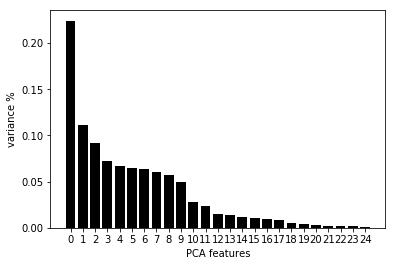

In [473]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [434]:
# As we can see from the graph the optimum number of components are 25.

In [435]:
pca = PCA(n_components=25)
principalComponents = pca.fit_transform(dfs)

In [436]:
pd.DataFrame(pca.components_,columns = dfs.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10','PC-11','PC-12','PC-13','PC-14','PC-15','PC-16','PC-17','PC-18','PC-19','PC-20','PC-21','PC-22','PC-23','PC-24','PC-25'])

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
PC-1,0.380666,0.327159,0.346320,0.294407,0.410629,0.412221,-0.278426,-0.324438,0.092842,-0.074712,-0.014064,-0.018136,-0.020664,-0.051621,0.010630,0.003340,-0.000642,-0.005535,0.000749,-0.001243,-0.012752,-0.027881,0.033893,0.005811,0.004260,0.000660,-0.002021,0.001361
PC-2,0.050426,0.103367,0.276574,0.297601,0.156447,0.195779,0.598707,0.570879,-0.188212,0.120571,0.020996,-0.051237,-0.062480,0.083190,-0.012322,-0.002202,-0.011953,0.004059,0.001358,0.004412,-0.014161,0.028053,0.005707,-0.008535,-0.006737,-0.067796,-0.000258,0.068054
PC-3,0.031122,0.038627,-0.019042,-0.015568,0.034155,0.038623,0.010081,-0.001487,0.126656,0.045452,0.595614,0.549607,0.301056,0.474952,-0.007593,-0.002003,0.020226,-0.004851,-0.001281,-0.000312,-0.027522,0.015433,0.001485,-0.001040,-0.000134,-0.007123,0.030531,-0.023408
PC-4,-0.213805,-0.267760,-0.126168,-0.118392,0.316275,0.283292,-0.155316,-0.119280,-0.258187,0.698742,0.030902,-0.005649,-0.191683,0.071251,-0.006358,-0.008967,-0.042790,0.007482,-0.007573,-0.004370,-0.049855,0.158303,-0.025161,-0.015861,-0.011208,-0.050911,-0.004437,0.055348
PC-5,-0.212989,-0.241349,0.478008,0.594282,-0.327270,-0.291265,-0.178860,-0.129448,0.067166,0.241566,0.015544,0.030634,0.001780,0.023348,0.012804,-0.006555,0.002256,0.002388,-0.003415,-0.005160,0.007496,0.070481,-0.057760,-0.006184,-0.003547,0.019021,0.001257,-0.020278
PC-6,0.393419,0.496987,-0.058082,-0.121717,-0.264882,-0.269910,0.016996,-0.000487,0.180774,0.476720,-0.075748,-0.196783,-0.147478,0.285084,0.002703,-0.003162,-0.032043,0.003243,-0.009430,-0.006217,-0.031768,0.142929,-0.071199,0.009109,-0.001461,0.029512,-0.004088,-0.025424
PC-7,-0.119192,-0.153192,-0.006457,0.006248,0.067848,0.063907,0.054042,0.028588,0.502082,-0.177004,0.120030,0.021800,-0.776627,0.209120,0.000826,-0.002268,0.002586,-0.001891,-0.003544,0.000735,-0.004076,-0.042109,0.052559,0.000285,-0.002276,0.003780,0.002118,-0.005898
PC-8,-0.088964,-0.123316,-0.033551,-0.029163,0.139158,0.134881,0.144875,0.102368,0.754493,0.250985,-0.234880,0.011228,0.407523,-0.215594,-0.007200,-0.002427,-0.010874,0.002953,-0.002382,-0.002240,-0.033391,0.065694,-0.010531,-0.004583,-0.002219,0.001695,-0.002651,0.000957
PC-9,0.126031,0.178000,-0.017737,-0.019832,-0.090301,-0.087026,0.046316,0.054354,-0.021881,0.172273,0.112036,0.591897,-0.272651,-0.675149,-0.018323,0.002658,0.004989,0.006286,-0.000613,-0.002506,0.022812,0.036988,-0.072654,-0.004039,0.006078,-0.004190,0.005297,-0.001107
PC-10,-0.018446,0.014225,-0.007678,0.028109,0.006042,0.023306,-0.020656,0.001416,-0.093134,-0.059255,-0.744242,0.548560,-0.047547,0.357395,-0.015825,0.000821,-0.003434,-0.000841,0.000922,0.000454,-0.009967,-0.002884,0.014192,0.002211,-0.001473,0.004296,-0.001925,-0.002371


In [437]:
PCA_components = pd.DataFrame(principalComponents)
PCA_components .head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,-3.157936,3.594686,-1.906747,-1.047926,-0.912874,-0.094614,0.618756,0.580694,0.425365,0.216027,-0.111668,0.090531,0.105923,0.119217,-0.156622,0.071925,-0.070887,-0.084345,-0.245555,0.311710,-0.061809,0.004435,-0.012724,0.102600,0.973392
1,-1.357622,-0.025746,-0.851557,-0.096897,0.114882,-0.305588,0.537037,-0.524682,0.417416,-0.109220,0.185185,-0.069829,-0.325412,-0.057231,-0.237080,0.129055,-0.112571,0.186256,1.033437,0.318140,-0.049984,0.008842,-0.009014,0.102302,0.986586
2,-3.298723,3.497007,1.292938,-1.549337,-0.844168,-0.693611,-1.469335,1.057898,-0.449558,-2.214855,-0.043587,0.085833,0.052993,0.064292,-0.170731,0.053417,0.030727,-0.094842,-0.209420,0.323521,-0.052661,0.002232,-0.020607,0.103652,0.991194
3,-1.974697,1.093648,0.171336,-0.374829,-0.137379,-0.282688,0.526482,-0.490521,0.186639,-0.789007,0.119167,-0.028332,-0.245167,-0.018365,-0.218651,0.129513,-0.071224,0.130778,0.947145,0.321803,-0.048921,0.011269,-0.012900,0.095231,0.988499
4,-0.984410,-0.258167,0.373711,0.161748,0.088960,-0.478563,0.810083,-0.871034,0.452552,-0.446729,0.192146,-0.068101,-0.071193,-0.138965,0.754702,-0.018510,-0.183718,0.136303,0.060197,0.354718,-0.080075,-0.009646,-0.009066,0.136072,1.000519


### KMEANS WITH PCA

In [438]:
#kmeans clustering in an iteration 

cluster_range = range(1,20)
cluster_error = []

for num_clusters in cluster_range:
    cluster = KMeans(num_clusters)
    cluster.fit(PCA_components)
    cluster_error.append(cluster.inertia_)

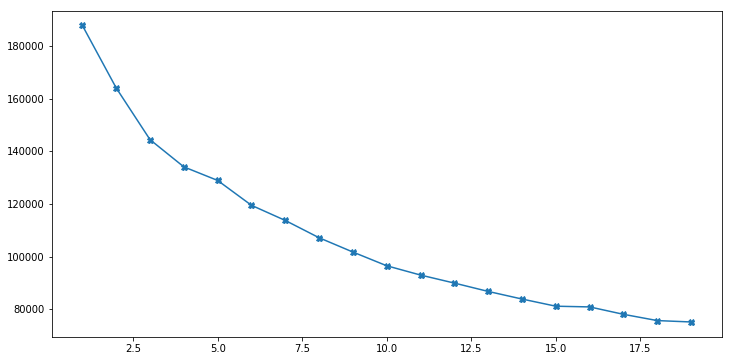

In [439]:
plot = pd.DataFrame({'num_clusters':cluster_range,'cluster_error':cluster_error})
plt.figure(figsize=(12,6))
plt.plot(plot['num_clusters'],plot['cluster_error'],'X-')

In [440]:
kmeans = KMeans(n_clusters= 2, init= 'k-means++' ,max_iter = 300 ,random_state= 0)
y_means = kmeans.fit_predict(PCA_components)
label = kmeans.labels_

In [366]:
y_kmean = pd.DataFrame({'predictedKmean':label})
kmeandf = pd.concat([PCA_components,y_kmean], 1 )
kmeandf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,predictedKmean
0,-3.157936,3.594686,-1.906747,-1.047926,-0.912874,-0.094614,0.618756,0.580694,0.425365,0.216027,-0.111668,0.090531,0.105923,0.119217,-0.156622,0.071925,-0.070887,-0.084345,-0.245555,0.311710,-0.061809,0.004435,-0.012724,0.102600,0.973392,0
1,-1.357622,-0.025746,-0.851557,-0.096897,0.114882,-0.305588,0.537037,-0.524682,0.417416,-0.109220,0.185185,-0.069829,-0.325412,-0.057231,-0.237080,0.129055,-0.112571,0.186256,1.033437,0.318140,-0.049984,0.008842,-0.009014,0.102302,0.986586,0
2,-3.298723,3.497007,1.292938,-1.549337,-0.844168,-0.693611,-1.469335,1.057898,-0.449558,-2.214855,-0.043587,0.085833,0.052993,0.064292,-0.170731,0.053417,0.030727,-0.094842,-0.209420,0.323521,-0.052661,0.002232,-0.020607,0.103652,0.991194,0
3,-1.974697,1.093648,0.171336,-0.374829,-0.137379,-0.282688,0.526482,-0.490521,0.186639,-0.789007,0.119167,-0.028332,-0.245167,-0.018365,-0.218651,0.129513,-0.071224,0.130778,0.947145,0.321803,-0.048921,0.011269,-0.012900,0.095231,0.988499,0
4,-0.984410,-0.258167,0.373711,0.161748,0.088960,-0.478563,0.810083,-0.871034,0.452552,-0.446729,0.192146,-0.068101,-0.071193,-0.138965,0.754702,-0.018510,-0.183718,0.136303,0.060197,0.354718,-0.080075,-0.009646,-0.009066,0.136072,1.000519,0


In [367]:
kmeandf = pd.concat([kmeandf,df['Revenue']], 1)
kmeandf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,predictedKmean,Revenue
0,-3.157936,3.594686,-1.906747,-1.047926,-0.912874,-0.094614,0.618756,0.580694,0.425365,0.216027,-0.111668,0.090531,0.105923,0.119217,-0.156622,0.071925,-0.070887,-0.084345,-0.245555,0.311710,-0.061809,0.004435,-0.012724,0.102600,0.973392,0,False
1,-1.357622,-0.025746,-0.851557,-0.096897,0.114882,-0.305588,0.537037,-0.524682,0.417416,-0.109220,0.185185,-0.069829,-0.325412,-0.057231,-0.237080,0.129055,-0.112571,0.186256,1.033437,0.318140,-0.049984,0.008842,-0.009014,0.102302,0.986586,0,False
2,-3.298723,3.497007,1.292938,-1.549337,-0.844168,-0.693611,-1.469335,1.057898,-0.449558,-2.214855,-0.043587,0.085833,0.052993,0.064292,-0.170731,0.053417,0.030727,-0.094842,-0.209420,0.323521,-0.052661,0.002232,-0.020607,0.103652,0.991194,0,False
3,-1.974697,1.093648,0.171336,-0.374829,-0.137379,-0.282688,0.526482,-0.490521,0.186639,-0.789007,0.119167,-0.028332,-0.245167,-0.018365,-0.218651,0.129513,-0.071224,0.130778,0.947145,0.321803,-0.048921,0.011269,-0.012900,0.095231,0.988499,0,False
4,-0.984410,-0.258167,0.373711,0.161748,0.088960,-0.478563,0.810083,-0.871034,0.452552,-0.446729,0.192146,-0.068101,-0.071193,-0.138965,0.754702,-0.018510,-0.183718,0.136303,0.060197,0.354718,-0.080075,-0.009646,-0.009066,0.136072,1.000519,0,False


In [368]:
df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [371]:
kmeandf['predictedKmean'].value_counts()

0    10464
1     1866
Name: predictedKmean, dtype: int64

In [372]:
kmeandf['Revenue'] = kmeandf['Revenue'].map({True:1,False:0})

In [374]:
confusion_matrix(kmeandf['Revenue'],kmeandf['predictedKmean'])

array([[9079, 1343],
       [1385,  523]], dtype=int64)

In [375]:
accuracy_score(kmeandf['Revenue'],kmeandf['predictedKmean'])

0.7787510137875101

### HIERARCHIAL METHOD WITH PCA

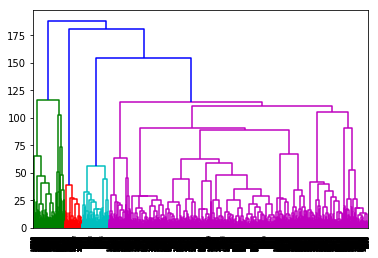

In [390]:
dendrogram(linkage(dfs,'ward'))
plt.show()

In [391]:
ag = AgglomerativeClustering(n_clusters = 2)
ag.fit(PCA_components)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2,
                        pooling_func='deprecated')

In [392]:
ag_pred = ag.fit_predict(PCA_components)

In [393]:
hc = pd.DataFrame({'predictedHC': ag_pred})

In [394]:
ag_df = pd.concat([PCA_components,hc], 1 )

In [396]:
hc_df = pd.concat([ag_df,df['Revenue']], 1 )

In [397]:
hc_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,predictedHC,Revenue
0,-3.157936,3.594686,-1.906747,-1.047926,-0.912874,-0.094614,0.618756,0.580694,0.425365,0.216027,-0.111668,0.090531,0.105923,0.119217,-0.156622,0.071925,-0.070887,-0.084345,-0.245555,0.311710,-0.061809,0.004435,-0.012724,0.102600,0.973392,0,False
1,-1.357622,-0.025746,-0.851557,-0.096897,0.114882,-0.305588,0.537037,-0.524682,0.417416,-0.109220,0.185185,-0.069829,-0.325412,-0.057231,-0.237080,0.129055,-0.112571,0.186256,1.033437,0.318140,-0.049984,0.008842,-0.009014,0.102302,0.986586,0,False
2,-3.298723,3.497007,1.292938,-1.549337,-0.844168,-0.693611,-1.469335,1.057898,-0.449558,-2.214855,-0.043587,0.085833,0.052993,0.064292,-0.170731,0.053417,0.030727,-0.094842,-0.209420,0.323521,-0.052661,0.002232,-0.020607,0.103652,0.991194,0,False
3,-1.974697,1.093648,0.171336,-0.374829,-0.137379,-0.282688,0.526482,-0.490521,0.186639,-0.789007,0.119167,-0.028332,-0.245167,-0.018365,-0.218651,0.129513,-0.071224,0.130778,0.947145,0.321803,-0.048921,0.011269,-0.012900,0.095231,0.988499,0,False
4,-0.984410,-0.258167,0.373711,0.161748,0.088960,-0.478563,0.810083,-0.871034,0.452552,-0.446729,0.192146,-0.068101,-0.071193,-0.138965,0.754702,-0.018510,-0.183718,0.136303,0.060197,0.354718,-0.080075,-0.009646,-0.009066,0.136072,1.000519,0,False


In [398]:
df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [399]:
hc_df['predictedHC'].value_counts()

0    11803
1      527
Name: predictedHC, dtype: int64

In [400]:
hc_df['Revenue'] = hc_df['Revenue'].map({True:1,False:0})

In [403]:
confusion_matrix(hc_df['Revenue'],hc_df['predictedHC'])

array([[10062,   360],
       [ 1741,   167]], dtype=int64)

In [404]:
accuracy_score(hc_df['Revenue'],hc_df['predictedHC'])

0.829602595296026

In [405]:
# As we can see the accuracy score of kmeans and agglomerative clustering has been increased after applying PCA

## BUILDING CLASSIFICATION MODELS WITH PCA

In [442]:
data2 = hc_df

In [443]:
data2 = data2.drop('Revenue',1)

In [444]:
X = data2.drop('predictedHC',1)
y = data2['predictedHC']

In [445]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

### LOGISTIC REGRESSION

In [446]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
lr = lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

In [447]:
print('ACC : ',accuracy_score(y_test,lr_pred))
print(confusion_matrix(y_test,lr_pred))

ACC :  0.986212489862125
[[3528   17]
 [  34  120]]


In [448]:
from sklearn.metrics import classification_report
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3545
           1       0.88      0.78      0.82       154

    accuracy                           0.99      3699
   macro avg       0.93      0.89      0.91      3699
weighted avg       0.99      0.99      0.99      3699



### KNN

In [449]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier()
knn = knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

In [450]:
print(confusion_matrix(y_test,knn_pred))
print(accuracy_score(y_test,knn_pred))

[[3535   10]
 [  31  123]]
0.9889159232224926


In [451]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3545
           1       0.92      0.80      0.86       154

    accuracy                           0.99      3699
   macro avg       0.96      0.90      0.93      3699
weighted avg       0.99      0.99      0.99      3699



### NAIVE BAYES

In [452]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb = nb.fit(X_train,y_train)
nb_pred = nb.predict(X_test)

In [453]:
print(confusion_matrix(y_test,nb_pred))
print("acc : ",accuracy_score(y_test,nb_pred))

[[3377  168]
 [  14  140]]
acc :  0.9507975128413084


In [454]:
print(classification_report(y_test,nb_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      3545
           1       0.45      0.91      0.61       154

    accuracy                           0.95      3699
   macro avg       0.73      0.93      0.79      3699
weighted avg       0.97      0.95      0.96      3699



### DECISION TREE

In [455]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt = dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)

In [456]:
print(confusion_matrix(y_test,dt_pred))
print('acc : ',accuracy_score(y_test,dt_pred))

[[3509   36]
 [  30  124]]
acc :  0.9821573398215734


In [457]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3545
           1       0.78      0.81      0.79       154

    accuracy                           0.98      3699
   macro avg       0.88      0.90      0.89      3699
weighted avg       0.98      0.98      0.98      3699



In [458]:
# As we can see clearly there is significant increase in the accuracy score after applying PCA.

In [459]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3545
           1       0.92      0.80      0.86       154

    accuracy                           0.99      3699
   macro avg       0.96      0.90      0.93      3699
weighted avg       0.99      0.99      0.99      3699



In [474]:
# Inference:
# The accuracy of the model before PCA with logistic regression is 0.96
# The accuracy of the model before PCA with KNeighboursClassifier is 0.98
# The accuracy of the model before PCA with naive bayes is 0.86
# The accuracy of the model before PCA with decision tree is 0.95

# Now let us see the accuracy score of each model after applying PCA
# The accuracy of the model after PCA with logistic regression is 0.986
# The accuracy of the model after PCA with KNeighboursClassifier is 0.988
# The accuracy of the model after PCA with naive bayes is 0.95
# The accuracy of the model after PCA with decision tree is 0.982
# We can see that the accuracy score has been considerably increased after applting PCA.